In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
def RBF_kernel(x_1, x_2, s, l=1):
    sqdist = np.sum((x_1 - x_2)**2)
    return s**2 * np.exp(-0.5 * (1 / l) * sqdist)

In [66]:
# write a kernel function that takes in two vectors and returns the kernel matrix with the above rbf kernel
def kernel(X1, X2, sigma):
    n1 = X1.shape[0]
    n2 = X2.shape[0]
    K = np.zeros((n1, n2))
    for i in range(n1):
        for j in range(n2):
            K[i, j] = RBF_kernel(X1[i], X2[j], sigma)
    return K

In [67]:
def train(X, y, sigma):
    K = kernel(X, X, sigma)
    return K

def predict(X, X_train, K, sigma, train_y):
    k_s = kernel(X_train, X, sigma)
    k_ss = kernel(X, X, sigma)
    prior_mean = 0
    posterior_mu = prior_mean + k_s.T@np.linalg.inv(K)@(train_y - prior_mean)
    posterior_sigma = k_ss - k_s.T@np.linalg.inv(K)@k_s
    return posterior_mu, posterior_sigma

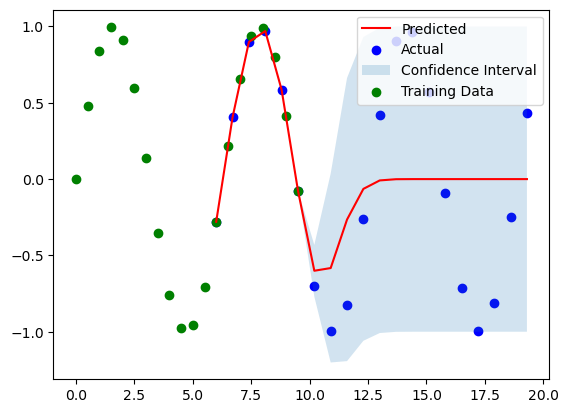

In [70]:
X_train = np.arange(0, 10, 0.5).reshape(-1, 1)
y_train = np.sin(X_train)
X_test = np.arange(6, 20, 0.7).reshape(-1, 1)
y_test = np.sin(X_test)
K = train(X_train, y_train, 1)
mu, cov = predict(X_test, X_train, K, 1, y_train)
std = np.sqrt(np.diag(cov))
mu = mu.flatten()
plt.plot(X_test, mu, 'r')
plt.scatter(X_test.squeeze(), y_test.squeeze(), c='b')
plt.fill_between(X_test.flatten(), mu - std, mu + std, alpha=0.2)
plt.scatter(X_train, y_train, c='g')
plt.legend(['Predicted', 'Actual', 'Confidence Interval', 'Training Data'])
plt.show()